In [1]:
# Install Essential Libraries
#23mid0181
#P.Pavan Kumar
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.7/802.7 kB 4.0 MB/s eta 0:00:00a 0:00:01


In [2]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# Configure the visual appearance of Seaborn plots
sns.set(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')

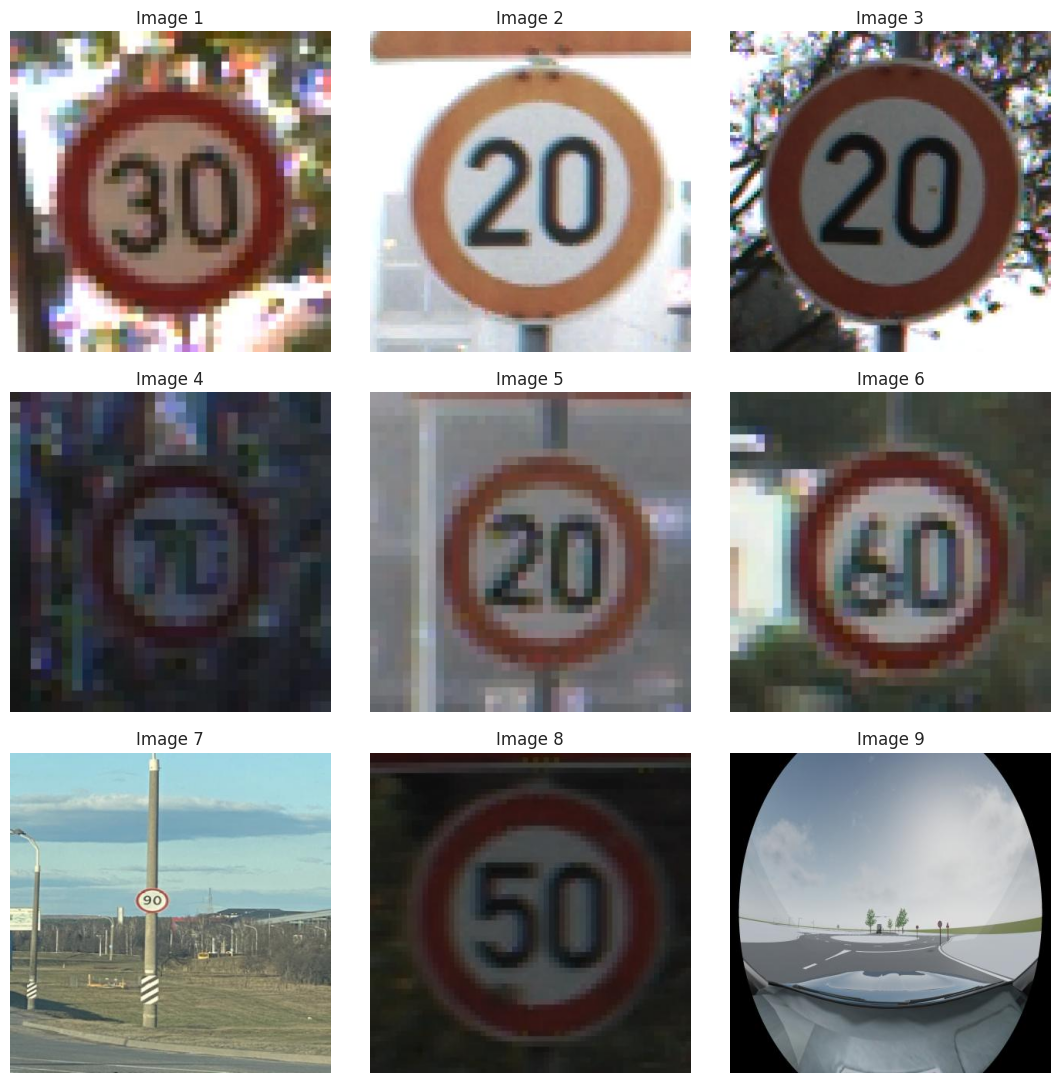

In [4]:
Image_dir = 'D:\AI_Project\dataset\input\cardetection\car\train\images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [5]:
# Get the size of the image
image = cv2.imread("D:\AI_Project\dataset\input\cardetection\car\train\images\00000_00000_00012_png.rf.23f94508dba03ef2f8bd187da2ec9c26.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.25M/6.25M [00:00<00:00, 78.3MB/s]



image 1/1 /kaggle/input/cardetection/car/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 640x640 (no detections), 7.9ms
Speed: 10.4ms preprocess, 7.9ms inference, 55.1ms postprocess per image at shape (1, 3, 640, 640)


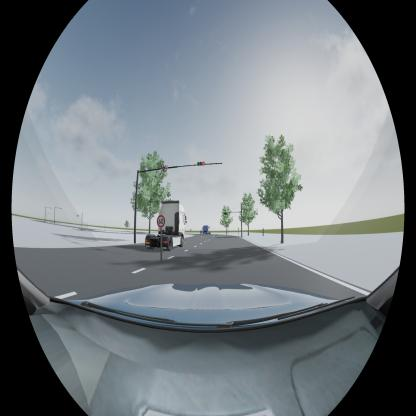

In [6]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt") 

# Use the model to detect object
image = "D\AI_Project\dataset\input\cardetection\car\train\images\FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(640))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [7]:
!pip install --upgrade ultralytics ray


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.7/65.7 MB 17.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: ray
    Found existing installation: ray 2.5.1
    Uninstalling ray-2.5.1:
      Successfully uninstalled ray-2.5.1


In [8]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  

# Training The Final Model
Result_Final_model = Final_model.train(data="D:\AI_Project\datasetinput\cardetection\car\data.yaml",epochs = 30, batch = -1, optimizer = 'auto')


Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/cardetection/car/data.yaml, epochs=30, time=None, patience=100, batch=-1, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 14.3MB/s]
2024-07-16 13:49:53,480	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-07-16 13:49:53,951	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
AutoBatch: Computing optimal batch size for imgsz=640 at 60.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla T4) 14.74G total, 0.23G reserved, 0.07G allocated, 14.44G free
      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
     3013773       8.209         0.319         26.08         84.57        (1, 3, 640, 640)                    list
     3013773       16.42         0.308         19.02         47.82        (2, 3, 640, 640)                    list
     3013773       32.84         0.543         17.84          52.4        (4, 3, 640, 640)                    list
     3013773       65.67         1.072         24.29         56.11        (8, 3, 640, 640)                    list
     3013773       131.3         2.032         38.84         66.61       (16, 3, 640, 640)                    list
Aut

train: Scanning /kaggle/input/cardetection/car/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:15<00:00, 234.89it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:03<00:00, 225.86it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005546875000000001), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      9.53G     0.9003      3.816      1.231        125        640: 100%|██████████| 50/50 [00:40<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.03it/s]

                   all        801        944     0.0462      0.762      0.106     0.0891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      9.41G     0.7314       2.68      1.092        106        640: 100%|██████████| 50/50 [00:37<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.267       0.42      0.277      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      9.43G     0.7322      2.254      1.071         94        640: 100%|██████████| 50/50 [00:36<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.11it/s]

                   all        801        944      0.456      0.496        0.4      0.324



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      9.44G     0.7114      1.914      1.067        121        640: 100%|██████████| 50/50 [00:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.563      0.562       0.61      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      9.44G     0.6876      1.604       1.04        109        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.811      0.665      0.768      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      9.41G     0.6686      1.391      1.037        114        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.803       0.69      0.787      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      9.44G     0.6538      1.275      1.022        110        640: 100%|██████████| 50/50 [00:36<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.685      0.639      0.728      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      9.44G     0.6359      1.136      1.011        113        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.842      0.738      0.835      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      9.44G     0.6243      1.051      1.004        111        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.884      0.769      0.874      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      9.43G     0.6375      1.008      1.009        142        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.871      0.738      0.854       0.72



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      9.44G     0.6091     0.9358     0.9947        122        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.886      0.839        0.9      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      9.44G     0.6083     0.9206      1.001        109        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.924      0.791      0.893      0.753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      9.44G     0.5964     0.8514     0.9823        115        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        801        944      0.912      0.817      0.905      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      9.41G     0.5914     0.8261     0.9857        120        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.929      0.843      0.921      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      9.43G     0.5747     0.7861     0.9822        113        640: 100%|██████████| 50/50 [00:37<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.933      0.842      0.927      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      9.41G     0.5731     0.7841     0.9787        116        640: 100%|██████████| 50/50 [00:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.22it/s]

                   all        801        944      0.939      0.848      0.931      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      9.41G     0.5672      0.759     0.9772        109        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.20it/s]

                   all        801        944      0.924       0.86      0.937      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      9.44G     0.5655     0.7365     0.9752        117        640: 100%|██████████| 50/50 [00:37<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.21it/s]

                   all        801        944      0.938      0.847      0.929      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      9.43G     0.5632     0.7142     0.9728        126        640: 100%|██████████| 50/50 [00:37<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.19it/s]

                   all        801        944       0.96      0.834      0.938        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      9.43G     0.5526     0.6856     0.9676        108        640: 100%|██████████| 50/50 [00:37<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.27it/s]

                   all        801        944      0.953      0.853       0.94      0.802


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      9.42G     0.5574     0.5288     0.9404         62        640: 100%|██████████| 50/50 [00:38<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.23it/s]

                   all        801        944      0.963      0.818      0.933      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      9.42G     0.5494     0.5011      0.936         69        640: 100%|██████████| 50/50 [00:35<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        801        944      0.926      0.881      0.944      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      9.42G     0.5365     0.4774     0.9326         60        640: 100%|██████████| 50/50 [00:34<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.20it/s]

                   all        801        944      0.926      0.873      0.944      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      9.42G      0.529     0.4575     0.9216         67        640: 100%|██████████| 50/50 [00:34<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.944      0.871      0.948      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      9.41G     0.5257     0.4379     0.9295         64        640: 100%|██████████| 50/50 [00:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.25it/s]

                   all        801        944      0.946      0.885      0.953      0.821



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.28it/s]

                   all        801        944      0.941      0.886      0.952       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      9.42G     0.5022     0.4093     0.9085         66        640: 100%|██████████| 50/50 [00:35<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.26it/s]

                   all        801        944      0.945      0.891      0.956      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      9.42G     0.5079     0.3928     0.9126         67        640: 100%|██████████| 50/50 [00:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.29it/s]

                   all        801        944      0.929      0.904      0.955      0.824



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      9.42G     0.4945     0.3838     0.9014         65        640: 100%|██████████| 50/50 [00:34<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:04<00:00,  1.24it/s]

                   all        801        944      0.939      0.909      0.958      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      9.42G     0.4902     0.3806     0.9019         68        640: 100%|██████████| 50/50 [00:35<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:05<00:00,  1.16it/s]

                   all        801        944      0.943      0.905      0.957       0.83



30 epochs completed in 0.358 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:07<00:00,  1.28s/it]


                   all        801        944      0.943      0.906      0.957       0.83
           Green Light         87        122      0.826      0.741      0.834      0.507
             Red Light         74        108      0.881      0.694      0.835      0.536
       Speed Limit 100         52         52       0.92      0.942      0.983      0.891
       Speed Limit 110         17         17      0.882      0.882      0.931      0.852
       Speed Limit 120         60         60          1      0.991      0.995      0.919
        Speed Limit 20         56         56      0.987      0.982      0.986      0.876
        Speed Limit 30         71         74      0.951      0.959      0.987      0.914
        Speed Limit 40         53         55      0.901      0.964      0.987      0.887
        Speed Limit 50         68         71      0.985        0.9      0.962      0.866
        Speed Limit 60         76         76      0.945      0.921      0.963      0.883
        Speed Limit 7

***5.1.2. Validation Step***

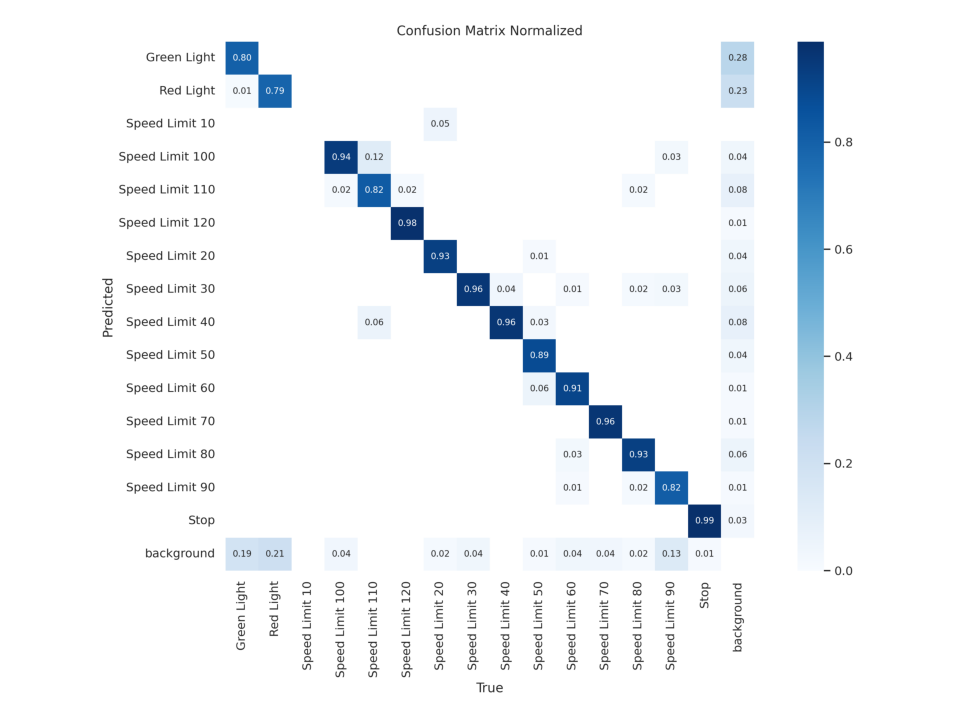

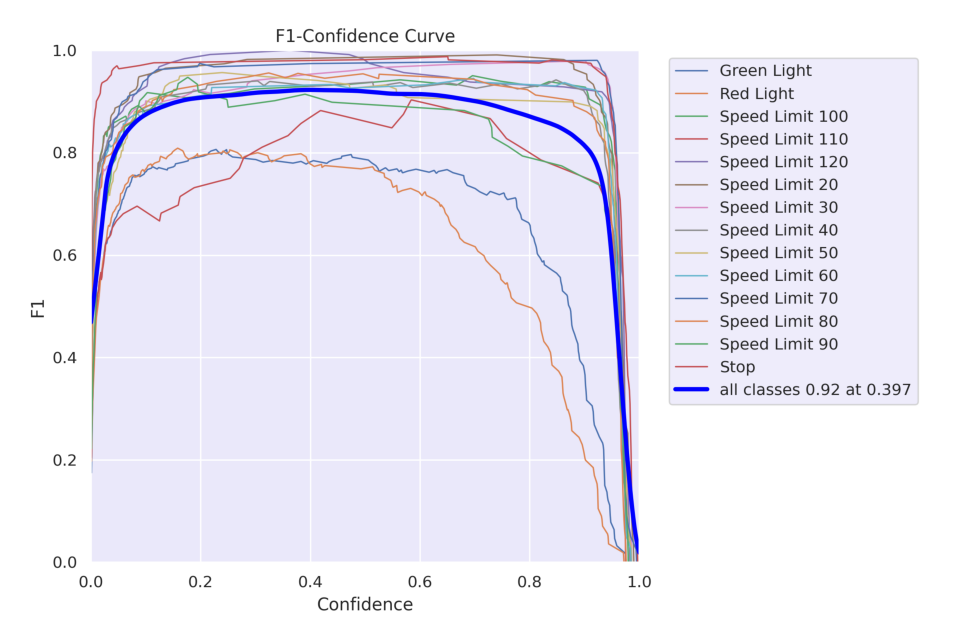

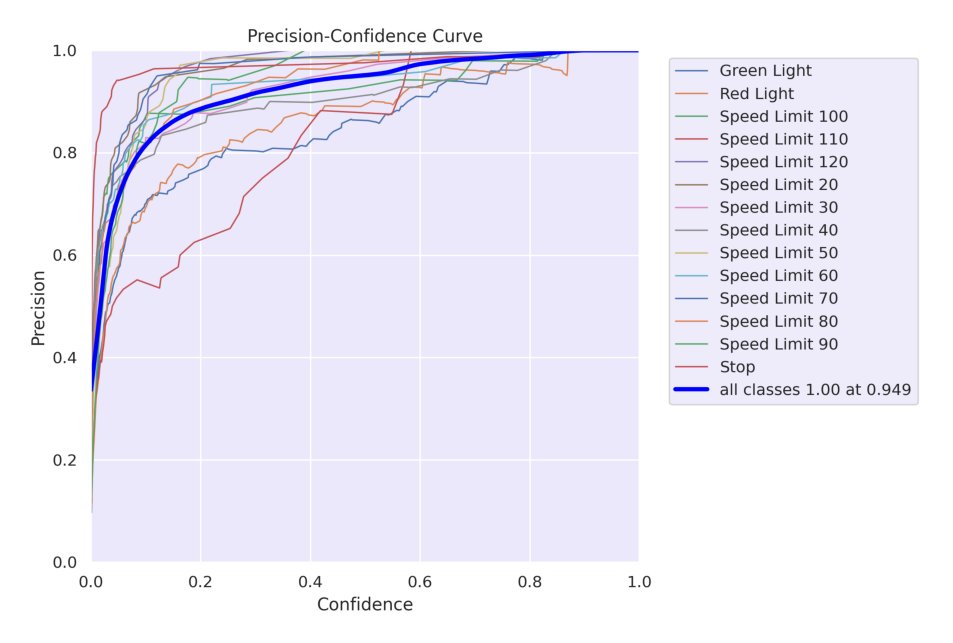

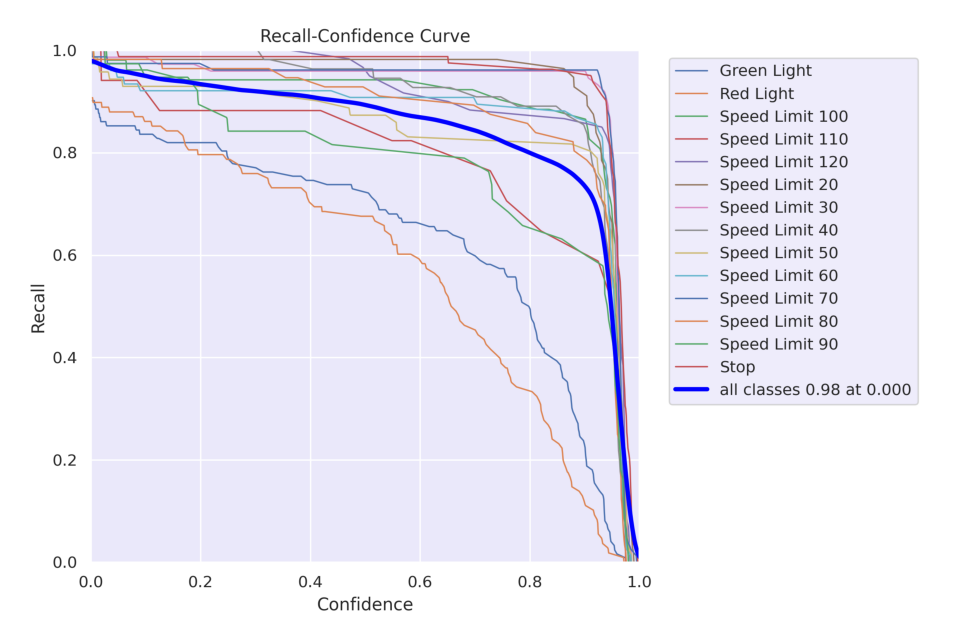

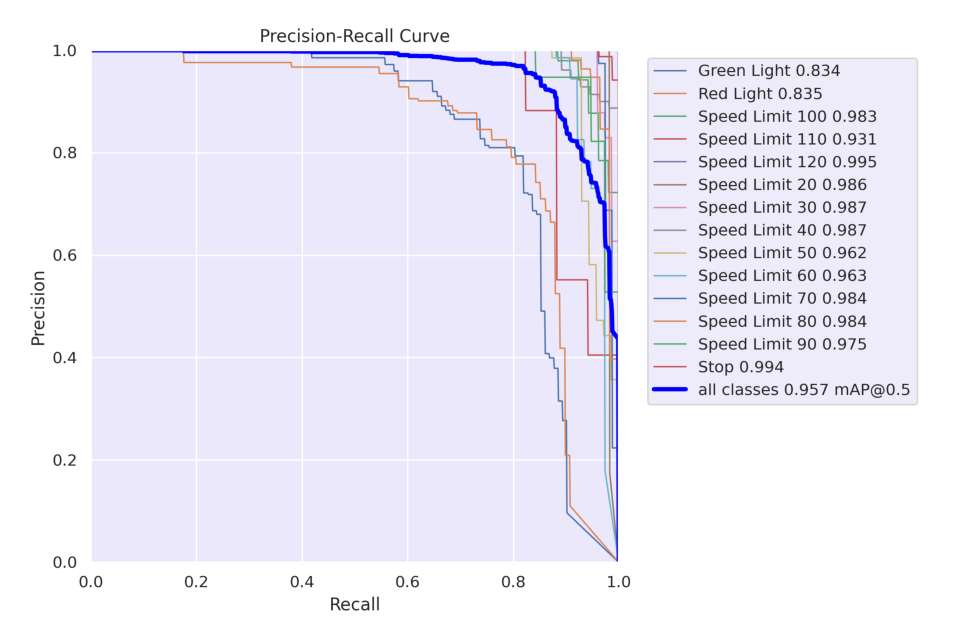

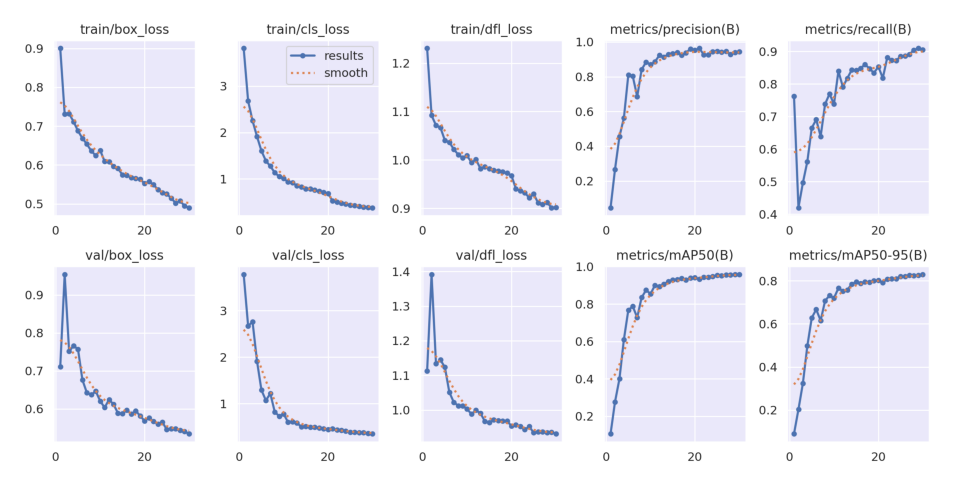

In [9]:
import os
import cv2
import matplotlib.pyplot as plt

def display_images(post_training_files_path, image_files):

    for image_file in image_files:
        image_path = os.path.join(post_training_files_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

# List of image files to display
image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]

# Path to the directory containing the images
post_training_files_path = 'D:\I_Project\working\runs\detect\train'

# Display the images
display_images(post_training_files_path, image_files)


In [10]:
Result_Final_model = pd.read_csv('D:/working/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
20                       21                  0.55740                  0.52881   
21                       22                  0.54938                  0.50105   
22                       23                  0.53653                  0.47742   
23                       24                  0.52901                  0.45752   
24                       25                  0.52568                  0.43794   
25                       26                  0.51426                  0.42990   
26                       27                  0.50218                  0.40930   
27                       28                  0.50789                  0.39283   
28                       29                  0.49446                  0.38381   
29                       30                  0.49017                  0.38064   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
20                  0.94040                  0.96343                  0.81798   
21                  0.93599                  0.92566                  0.88105   
22                  0.93256                  0.92601                  0.87273   
23                  0.92159                  0.94448                  0.87110   
24                  0.92954                  0.94604                  0.88493   
25                  0.91126                  0.94099                  0.88593   
26                  0.90848                  0.94543                  0.89077   
27                  0.91260                  0.92909                  0.90408   
28                  0.90141                  0.93868                  0.90941   
29                  0.90189                  0.94317                  0.90490   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
20                  0.93275                  0.79194                  0.57663   
21                  0.94360                  0.80859                  0.56651   
22                  0.94378                  0.80903                  0.56020   
23                  0.94789                  0.81055                  0.56475   
24                  0.95295                  0.82069                  0.54540   
25                  0.95179                  0.82002                  0.54739   
26                  0.95616                  0.82587                  0.54801   
27                  0.95452                  0.82420                  0.54305   
28                  0.95800                  0.82593                  0.54046   
29                  0.95719                  0.83020                  0.53427   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
20                  0.45824                  0.95732                 0.000179   
21                  0.43104                  0.95234                 0.000161   
22                  0.42374                  0.94359                 0.000144   
23                  0.40938                  0.95220                 0.000127   
24                  0.38604                  0.93454                 0.000109   
25                  0.38483                  0.93668                 0.000092   
26                  0.37515                  0.93724                 0.000075   
27                  0.37637                  0.93477                 0.000057   
28                  0.35780                  0.93587                 0.000040   
29                  0.35107                  0.93138                 0.000023   

                     lr/pg1                   lr/pg2  
20                 0.000179                 0.000179  
21                 0.000161                 0.000161  
22                 0.000144                 0.000144  
23                 0.000127                 0.000127  
24                 0.000109                 0.000109  
25                 0.000092                 0.000092  
26                 0.000075                 0.000075  
27            

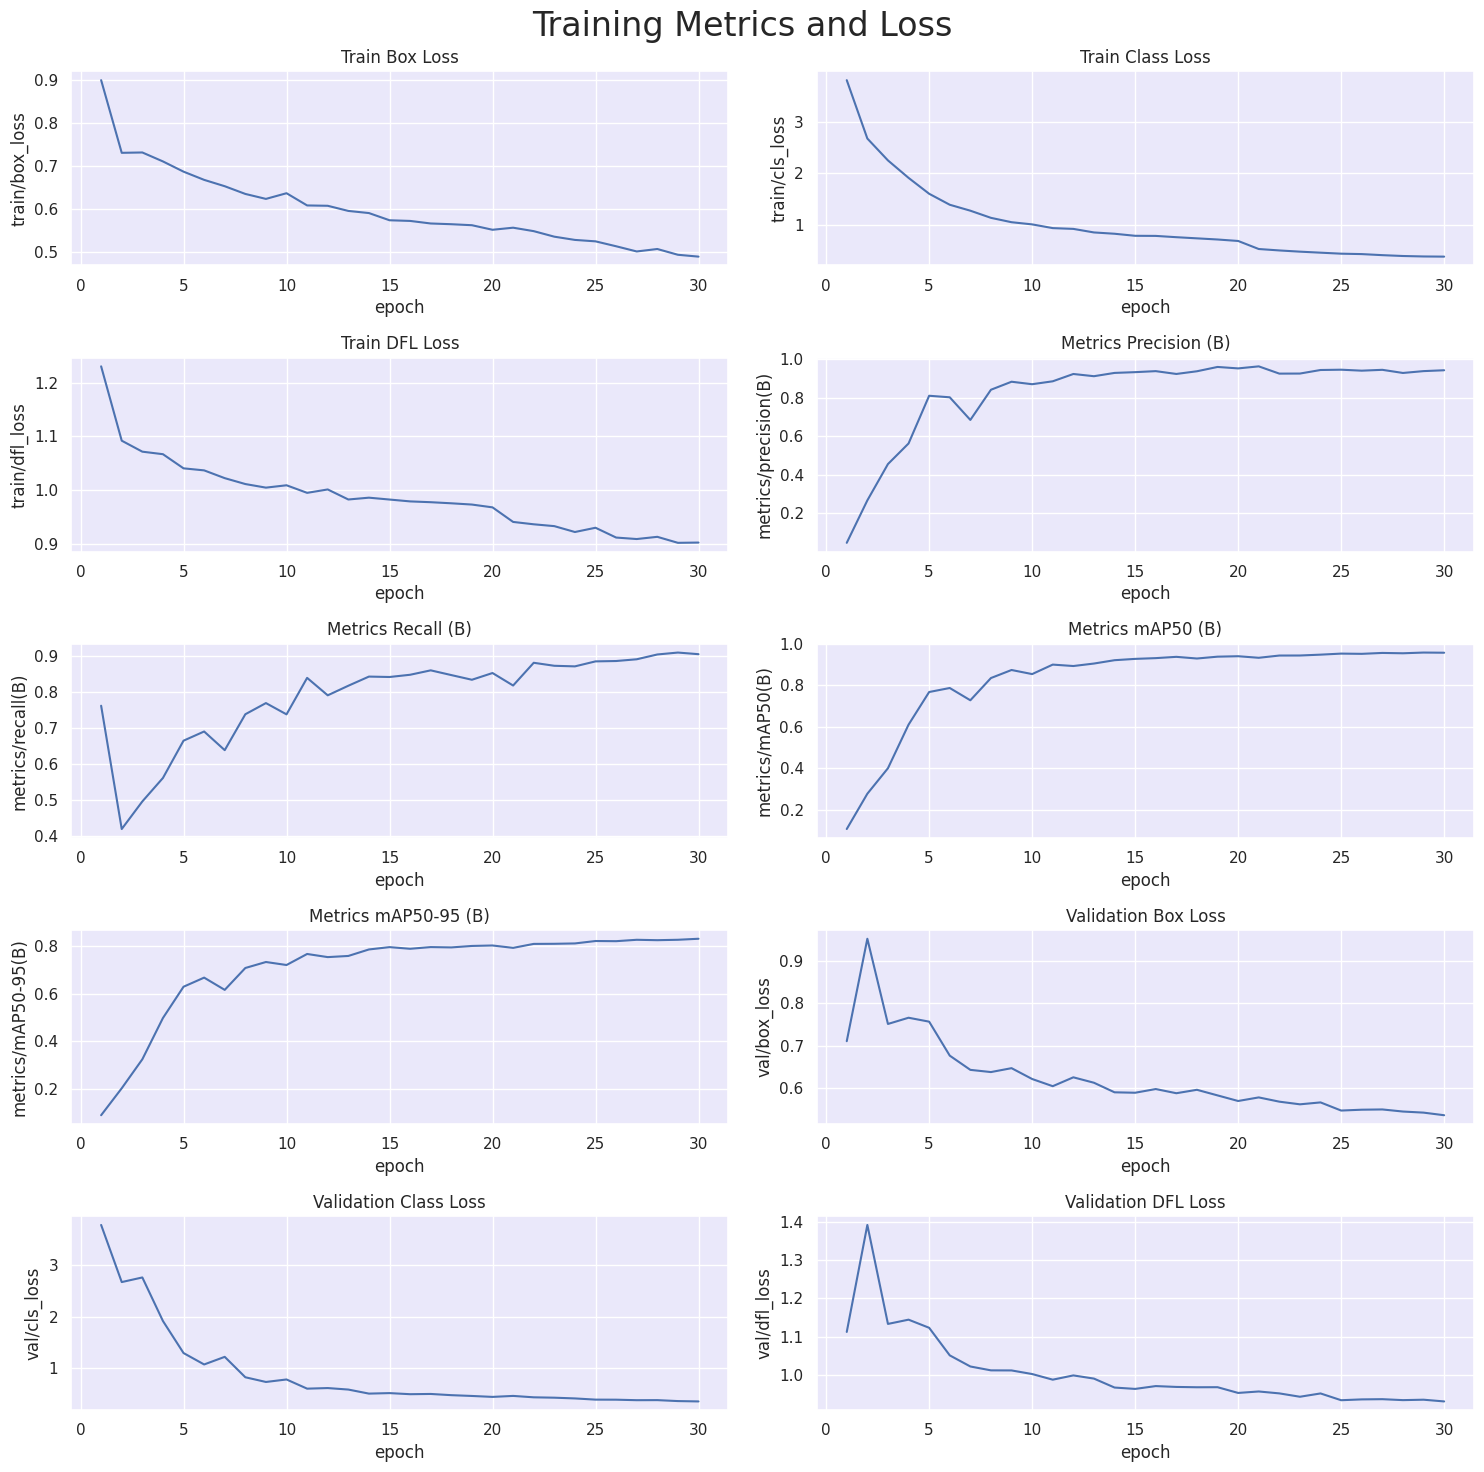

In [13]:
# Read the results.csv file as a pandas dataframe
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [14]:
# Loading the best performing model
Valid_model = YOLO('D:\AI_Project\\working\runs\detect\train\weights\best.pt')

# Evaluating the model on the validset
metrics = Valid_model.val(split = 'val')

# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics YOLOv8.2.58 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /kaggle/input/cardetection/car/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<00:00, 822.02it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/cardetection/car/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [00:06<00:00,  7.37it/s]


                   all        801        944      0.942      0.906      0.957       0.83
           Green Light         87        122      0.819      0.741      0.833      0.512
             Red Light         74        108      0.881      0.694      0.835      0.541
       Speed Limit 100         52         52       0.92      0.942      0.983      0.891
       Speed Limit 110         17         17      0.882      0.881      0.932      0.845
       Speed Limit 120         60         60          1      0.991      0.995      0.916
        Speed Limit 20         56         56      0.987      0.982      0.986      0.875
        Speed Limit 30         71         74      0.951      0.959      0.987      0.911
        Speed Limit 40         53         55      0.901      0.964      0.987      0.894
        Speed Limit 50         68         71      0.985      0.901      0.962      0.862
        Speed Limit 60         76         76      0.945      0.921      0.963      0.881
        Speed Limit 7


0: 640x640 1 Speed Limit 50, 1 Speed Limit 80, 7.4ms
Speed: 1.5ms preprocess, 7.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 110, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 40, 7.4ms
Speed: 1.7ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.4ms
Speed: 1.9ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 120, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Stop, 7.4ms
Speed: 1.8ms preprocess, 7.4ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Speed Limit 80, 7.4ms
Speed: 1.8ms preprocess, 7.4ms

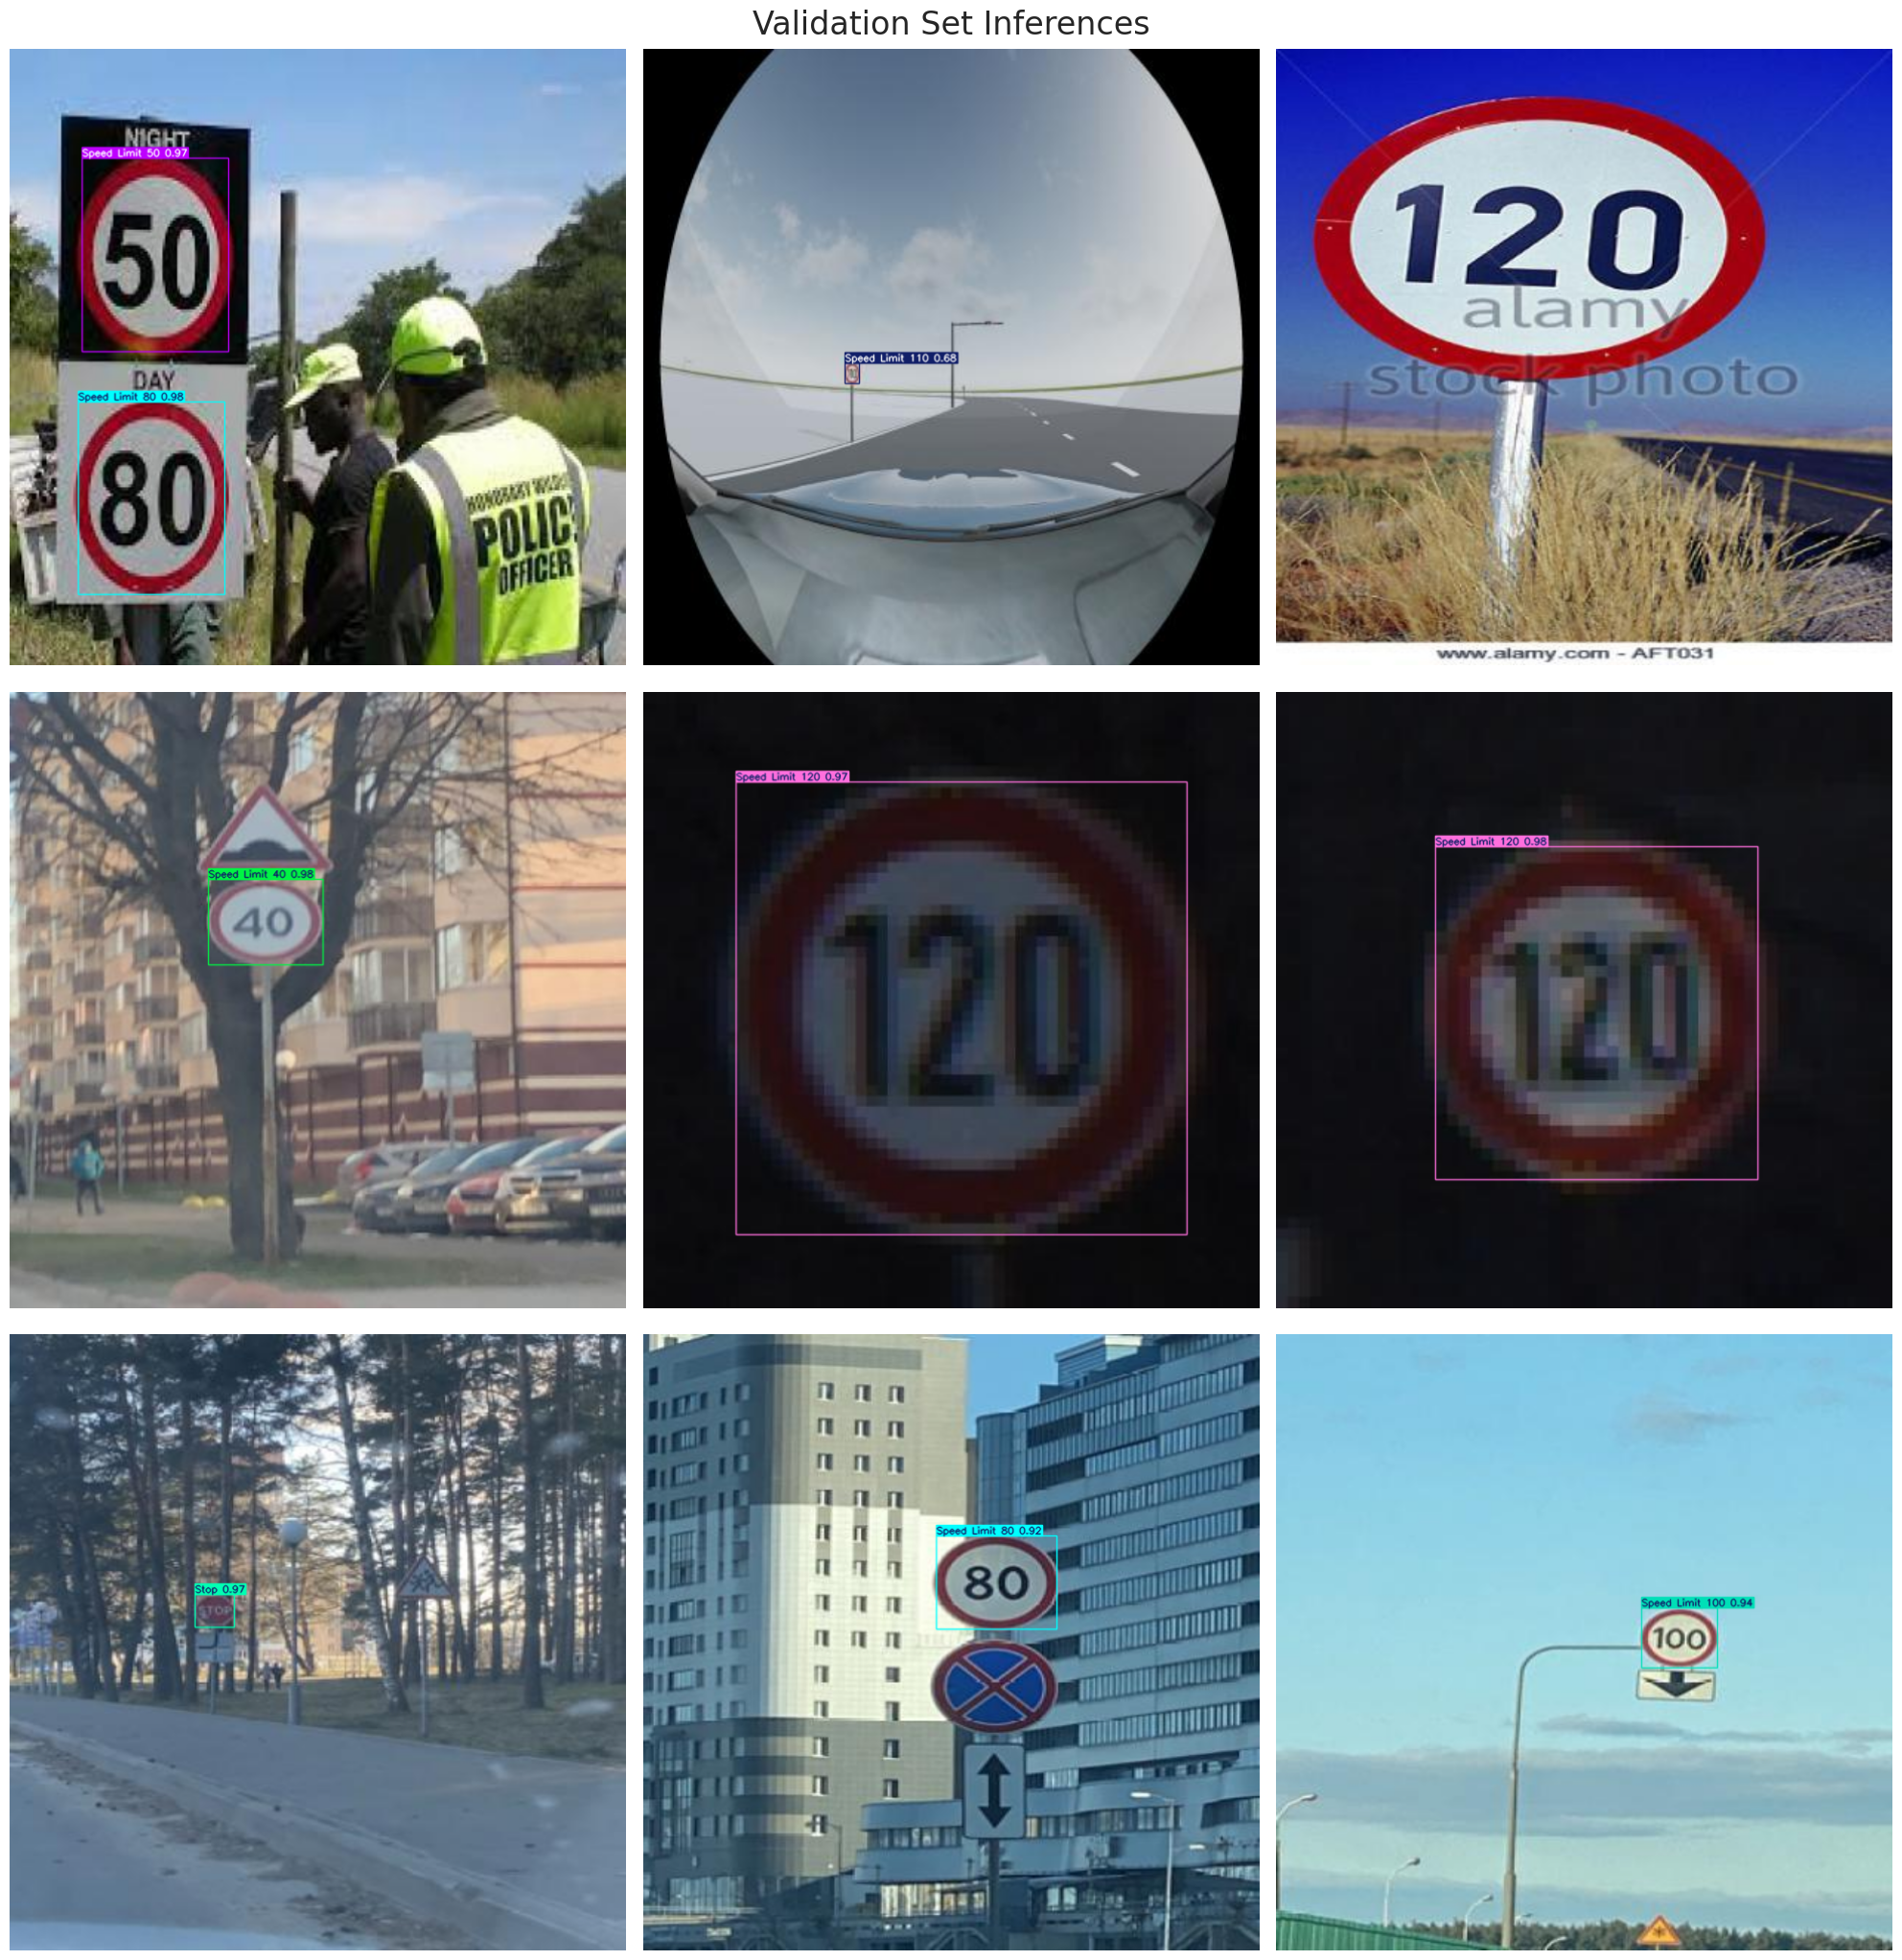

In [15]:
# Normalization function
def normalize_image(image):
    return image / 255.0

# Image resizing function
def resize_image(image, size=(640, 640)):
    return cv2.resize(image, size)

# Path to validation images
dataset_path = 'D:\AI_Project\input\cardetection\car'  # Place your dataset path here
valid_images_path = os.path.join(dataset_path, 'test', 'images')

# List of all jpg images in the directory
image_files = [file for file in os.listdir(valid_images_path) if file.endswith('.jpg')]

# Check if there are images in the directory
if len(image_files) > 0:
    # Select 9 images at equal intervals
    num_images = len(image_files)
    step_size = max(1, num_images // 9)  # Ensure the interval is at least 1
    selected_images = [image_files[i] for i in range(0, num_images, step_size)]

    # Prepare subplots
    fig, axes = plt.subplots(3, 3, figsize=(20, 21))
    fig.suptitle('Validation Set Inferences', fontsize=24)

    for i, ax in enumerate(axes.flatten()):
        if i < len(selected_images):
            image_path = os.path.join(valid_images_path, selected_images[i])
            
            # Load image
            image = cv2.imread(image_path)
            
            # Check if the image is loaded correctly
            if image is not None:
                # Resize image
                resized_image = resize_image(image, size=(640, 640))
                # Normalize image
                normalized_image = normalize_image(resized_image)
                
                # Convert the normalized image to uint8 data type
                normalized_image_uint8 = (normalized_image * 255).astype(np.uint8)
                
                # Predict with the model
                results = Valid_model.predict(source=normalized_image_uint8, imgsz=640, conf=0.5)
                
                # Plot image with labels
                annotated_image = results[0].plot(line_width=1)
                annotated_image_rgb = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
                ax.imshow(annotated_image_rgb)
            else:
                print(f"Failed to load image {image_path}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()
